## Base Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
train_data_base = pd.read_excel('Data_Train.xlsx')

In [3]:
train_data = train_data_base.copy()

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Explore Null Values and Duplicates

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data[train_data['Route'].isna() | train_data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
train_data.duplicated().sum()

220

In [12]:
train_data[train_data.duplicated(keep=False)].sort_values(by=['Price'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
2692,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
2044,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,4777
...,...,...,...,...,...,...,...,...,...,...,...
3790,Jet Airways,6/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,05:25,19:45 07 Mar,38h 20m,2 stops,No info,16914
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
1676,Jet Airways,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:45 07 Mar,24h 35m,2 stops,No info,19329


In [13]:
train_data.drop_duplicates(inplace=True)

In [14]:
train_data.duplicated().sum()

0

In [15]:
(train_data['Additional_Info'].value_counts() / train_data.shape[0]) * 100

No info                         78.206844
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
No Info                          0.028675
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

In [16]:
train_data.drop(columns=['Additional_Info'], inplace=True)

### Since most of the values in the additional info column are "no info", I have decided to drop the column.

In [17]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

## Condense Time Columns into Departure and Arrival for easier data exploration

In [19]:
train_data['Departure'] = pd.to_datetime(train_data['Date_of_Journey'] + ' ' + train_data['Dep_Time'])

In [20]:
durations = pd.to_timedelta(train_data['Duration'])

In [21]:
train_data['Arrival'] = train_data['Departure'] + durations

In [22]:
train_data.drop(columns=['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration'], inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Departure,Arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,2019-03-24 22:20:00,2019-03-25 01:10:00
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,2019-01-05 05:50:00,2019-01-05 13:15:00
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,2019-09-06 09:25:00,2019-09-07 04:25:00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,2019-12-05 18:05:00,2019-12-05 23:30:00
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,2019-01-03 16:50:00,2019-01-03 21:35:00


## Data Exploration

### Flights vs Time

In [24]:
train_data['Dep_Hour'] = train_data['Departure'].dt.hour

Text(0, 0.5, 'Number of Flight')

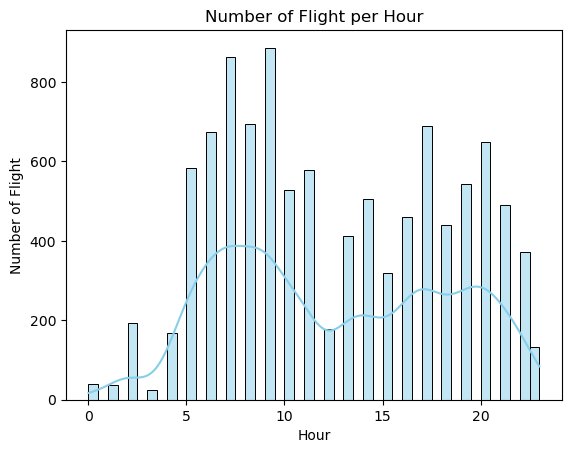

In [25]:
sns.histplot(data=train_data, x='Dep_Hour', bins=24, kde=True, color='skyblue', binwidth=0.5)
plt.title('Number of Flight per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Flight')

#### The data seems to contain a bimodal distribution. One distribution seems to lie between the morning and afternoon and another in the evening.

In [34]:
def classify_dep_time(x):
    if (x>4) and (x<=8): return "Early Morning"
    elif (x>8) and (x<=12): return "Morning"
    elif (x>12) and (x<=16): return "Noon"
    elif (x>16) and (x<=20): return "Evening"
    elif (x>20) and (x<=24): return "Night"
    else: return "Late Night"

Text(0, 0.5, 'Number of Flights')

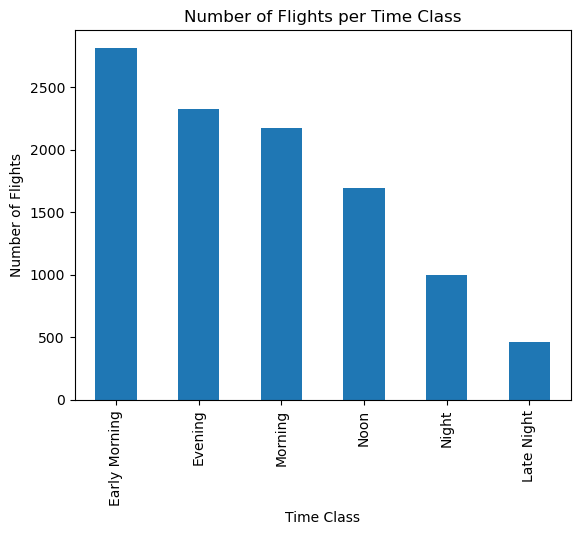

In [35]:
train_data['Dep_Hour'].apply(classify_dep_time).value_counts().plot(kind='bar')
plt.title('Number of Flights per Time Class')
plt.xlabel('Time Class')
plt.ylabel('Number of Flights')

#### The bar plot show the volume of flights for each time period more clearly. The majority of flights are in the morning and evening, and flight volumes are very low late in the night.

### Price vs Duration and Stops

In [36]:
train_data['Duration_Minutes'] = (train_data['Arrival'] - train_data['Departure']).dt.seconds / 60

<Axes: xlabel='Duration_Minutes', ylabel='Price'>

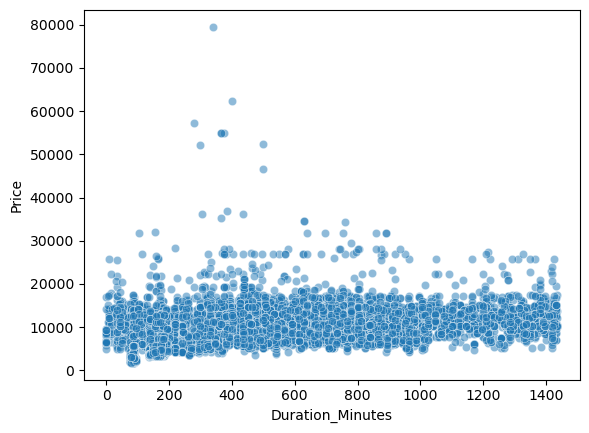

In [37]:
sns.scatterplot(data=train_data, x='Duration_Minutes', y='Price', alpha=0.5)

#### The scatter plot does not reveal a relationship between duration and price.

<Axes: xlabel='Duration_Minutes', ylabel='Price'>

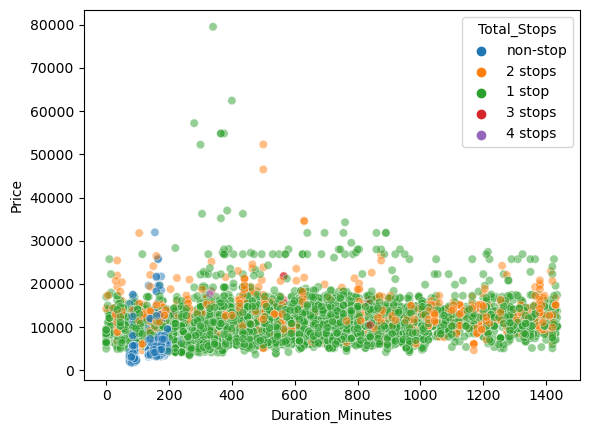

In [38]:
sns.scatterplot(data=train_data, x='Duration_Minutes', y='Price', alpha=0.5, hue='Total_Stops')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


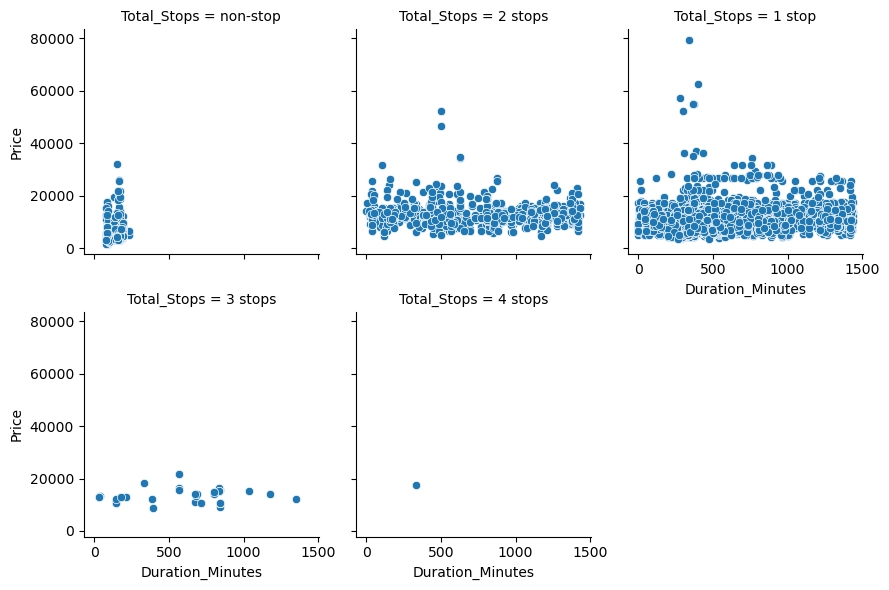

In [51]:
g = sns.FacetGrid(train_data, col='Total_Stops',col_wrap=3)
g.map_dataframe(sns.scatterplot, x='Duration_Minutes', y='Price')
plt.show()

#### Even when splitting the data by total stops, a relationship is still not present between price and duration.

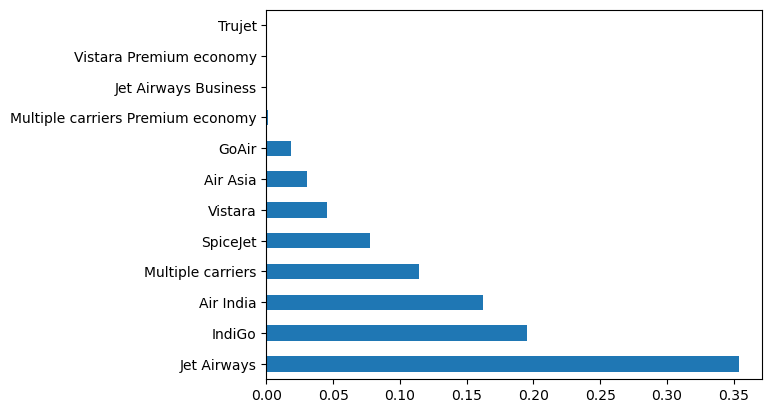

<Figure size 800x800 with 0 Axes>

In [50]:
(train_data['Airline'].value_counts()/ train_data.shape[0]).T.plot(kind='barh')
plt.figure(figsize=(8,8))
plt.tight_layout()

#### Jet Airways, IndiGo and Air India populate most of the data set.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


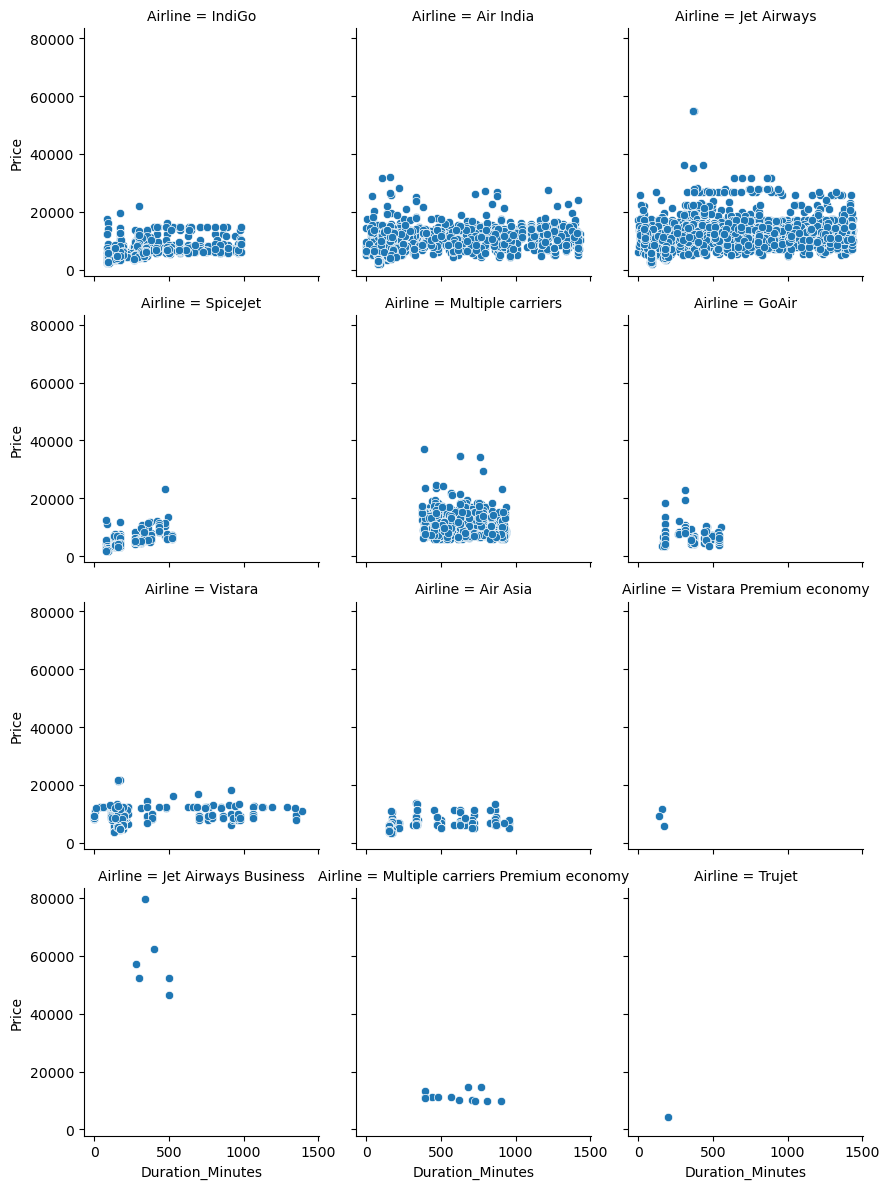

In [34]:
g = sns.FacetGrid(train_data, col='Airline',col_wrap=3)
g.map_dataframe(sns.scatterplot, x='Duration_Minutes', y='Price')
plt.show()

#### When splitting the data by airline, the only plot that reveals a relationship between price and duration in Spice jet.

## Prepare Data for Machine Learning

### I will use the one hot encoder to transform the source categorical variable in a numerical one.

In [52]:
from sklearn.preprocessing import OneHotEncoder
one_hot_source = OneHotEncoder(drop='first')
sources = one_hot_source.fit_transform(train_data[['Source']])

In [53]:
sources.toarray()

array([[0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [54]:
source_names = list(one_hot_source.get_feature_names_out())

In [55]:
sources_df = pd.DataFrame(sources.toarray(), columns=source_names)

In [56]:
sources_df

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
10457,0.0,0.0,1.0,0.0
10458,0.0,0.0,1.0,0.0
10459,0.0,0.0,0.0,0.0
10460,0.0,0.0,0.0,0.0


In [57]:
train_data.reset_index(inplace=True)
train_data.drop(columns=['index'], inplace=True)

In [59]:
train_data = pd.concat([train_data, sources_df], axis=1)

In [60]:
train_data.shape

(10462, 14)

### Relevant Departures and Arrivals information I will use in the model that may affect price are the time of day, month of the flight, if the dat is a weekend or a holiday.

In [61]:
train_data['Dep_Month'] = train_data['Departure'].dt.month
train_data['Dep_Is_Weekend'] = train_data['Departure'].dt.weekday.isin([5,6])
train_data['Arr_Month'] = train_data['Arrival'].dt.month
train_data['Arr_Is_Weekend'] = train_data['Arrival'].dt.weekday.isin([5,6])
train_data['Arr_Hour'] = train_data['Arrival'].dt.hour

In [62]:
import holidays
def isHoliday(date):
    in_holidays = holidays.IN()
    return date in in_holidays

In [63]:
train_data['Dep_Holiday'] = train_data['Departure'].apply(isHoliday)
train_data['Arr_Holiday'] = train_data['Arrival'].apply(isHoliday)

### I will manually encode the number of stops from text to a numerical form

In [64]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
mapper = {}
train_data['Total_Stops'].unique()
for stop in train_data['Total_Stops'].unique():
    if stop[0].isdigit():
        mapper[stop] = int(stop[0])
    elif stop == 'non-stop':
        mapper[stop] = 0



In [66]:
train_data['Total_Stops'] = train_data['Total_Stops'].map(mapper)

In [68]:
train_data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### With the large number of airlines, I will encode the airlines ordinally by price to avoid adding many extra features which would be the case if we used one hot encoding.

In [53]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [70]:
airlines = train_data.groupby('Airline')['Price'].mean().sort_values().reset_index()
airlines['index'] = airlines.index
airlines.drop(columns=['Price'], inplace=True)
airlines.set_index('Airline', inplace=True)
airline_mapper = airlines.to_dict()['index']

### I will use the same ordinal encoding method on the destination for the flight.

In [71]:
destination = train_data.groupby('Destination')['Price'].mean().sort_values().reset_index()
destination['index'] = destination.index
destination.set_index('Destination', inplace=True)
destination.drop(columns=['Price'], inplace=True)
destination_mapper = destination.to_dict()['index']

In [72]:
train_data['Airline'] = train_data['Airline'].map(airline_mapper)

In [73]:
train_data['Destination'] = train_data['Destination'].map(destination_mapper)

### Clean data by dropping unnecessary columns

In [74]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Price',
       'Departure', 'Arrival', 'Dep_Hour', 'Duration_Minutes',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Dep_Month', 'Dep_Is_Weekend', 'Arr_Month', 'Arr_Is_Weekend',
       'Arr_Hour', 'Dep_Holiday', 'Arr_Holiday'],
      dtype='object')

In [75]:
train_data.drop(columns=['Source','Route','Departure','Arrival'], inplace=True)

In [76]:
train_data = train_data.astype(int)

### Many outliers exists in the data which can be shown in the plots below, I will use IQR methods to drop data points for the price variable which exceed the IQR boundaries.

In [78]:
train_data['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

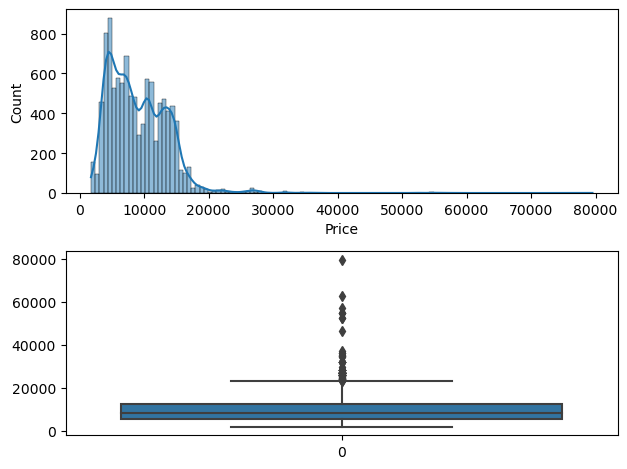

In [79]:
plt.subplot(211)
sns.histplot(train_data['Price'], kde=True)

plt.subplot(212)
sns.boxplot(train_data['Price'])

plt.tight_layout()

In [88]:
IQR = train_data['Price'].quantile(0.75) - train_data['Price'].quantile(0.25)
upper_limit = 1.5*IQR + train_data['Price'].quantile(0.75)

In [89]:
upper_limit

23025.875

In [90]:
print('count: ',train_data['Price'].count())
print('count beyond upper limit: ',train_data['Price'].apply(lambda x: x > upper_limit).sum())

count:  10462
count beyond upper limit:  94


In [91]:
train_data_no_outliers = train_data[train_data['Price'] <= upper_limit]

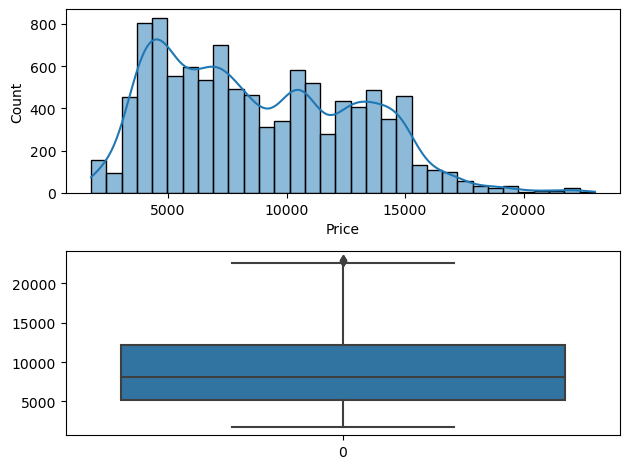

In [92]:
plt.subplot(211)
sns.histplot(train_data_no_outliers['Price'], kde=True)

plt.subplot(212)
sns.boxplot(train_data_no_outliers['Price'])

plt.tight_layout()

### With only 94 of the 10462 data point beyond the upper limit for the price variable, I will not use these data points because only a small amount of the data is lost.

### View Feature Importance

In [93]:
X = train_data_no_outliers.drop(columns='Price')
y = train_data_no_outliers['Price']

In [94]:
from sklearn.feature_selection import mutual_info_regression

In [95]:
mir = mutual_info_regression(X, y)

In [96]:
mir_df = pd.DataFrame(mir , index=X.columns, columns=['Importance'])
mir_df.sort_values(by='Importance', ascending=False)

,Importance
Duration_Minutes,1.646584
Airline,1.326166
Destination,1.173292
Arr_Hour,1.149343
Dep_Hour,0.909050
Total_Stops,0.771109
Source_Delhi,0.511134
Source_Kolkata,0.465508
Dep_Month,0.394711
Arr_Month,0.394005


### The mutual info regression shows the weight of each feature on the price variable in order. This information may be helpful if we find using less varibles increases the performance of the model.

## Applying machine learning

In [104]:
# Importing various regression models from sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split

In [98]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

In [102]:
# Function to evaluate each model
def evaluate_models(models, X, y):
    results = {}
    for name, model in models.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Feature scaling
            ('regressor', model)
        ])
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
        results[name] = -scores.mean()  # Negate the scores to get positive MSE
    return results

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [107]:
results = evaluate_models(models, X_train, y_train)

C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

In [114]:
results_squared = results.copy()
for i in results_squared.keys():
    results_squared[i] = np.sqrt(results_squared[i])

In [119]:
results_squared

{'Linear Regression': 2446.769298316039,
 'Ridge Regression': 2446.767992978292,
 'Lasso Regression': 2446.7347188271347,
 'ElasticNet': 2599.6620263386153,
 'Bayesian Ridge': 2446.762399444042,
 'Support Vector Regression': 3945.3365784501348,
 'K-Nearest Neighbors': 2201.1748512910463,
 'Decision Tree': 2468.574700694906,
 'Random Forest': 2022.7173174926418,
 'Gradient Boosting': 2098.605500236078,
 'AdaBoost': 2734.463493041278,
 'MLP Regressor': 2350.727610507106}

#### With the random forest and gradient boosting have the only mse below 2100, I will proceed to use those two algorithms for hyper parameter tuning.

### Explore best models options

In [120]:
model_1 = RandomForestRegressor()
model_2 = GradientBoostingRegressor()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

GradientBoostingRegressor()

In [126]:
for i in sorted(zip(model_1.feature_importances_,X_train.columns), reverse=True):
    print(i)

(0.49416457281894177, 'Total_Stops')
(0.1726571884524175, 'Airline')
(0.08558062327942559, 'Duration_Minutes')
(0.0412067869136359, 'Arr_Hour')
(0.04115669493477033, 'Dep_Hour')
(0.034512387759155994, 'Dep_Month')
(0.03395494702891501, 'Arr_Month')
(0.026961536280265867, 'Destination')
(0.015087627690694412, 'Arr_Holiday')
(0.013328308364466395, 'Dep_Is_Weekend')
(0.012604463386505643, 'Dep_Holiday')
(0.009155986503084867, 'Arr_Is_Weekend')
(0.00836846038313016, 'Source_Delhi')
(0.007682163179339411, 'Source_Kolkata')
(0.0023467511722954026, 'Source_Mumbai')
(0.001231501852955707, 'Source_Chennai')


In [127]:
for i in sorted(zip(model_2.feature_importances_,X_train.columns), reverse=True):
    print(i)

(0.6259873007853327, 'Total_Stops')
(0.21471691490059897, 'Airline')
(0.033854024888854514, 'Destination')
(0.032276768085198075, 'Duration_Minutes')
(0.02212509902262563, 'Dep_Month')
(0.017236854771249564, 'Arr_Month')
(0.015971267296299642, 'Arr_Holiday')
(0.010431529668886627, 'Dep_Holiday')
(0.00895509596905404, 'Arr_Hour')
(0.008929401556248709, 'Dep_Is_Weekend')
(0.0037071625179594626, 'Dep_Hour')
(0.0024058057323481947, 'Source_Mumbai')
(0.001430668097562628, 'Arr_Is_Weekend')
(0.001095285551934515, 'Source_Kolkata')
(0.0007244839928250972, 'Source_Delhi')
(0.00015233716302142142, 'Source_Chennai')


#### When looking at he feature importance for the two models selected, it seems the total stops and the airline are the best predictors for the price of a flight.

In [129]:
np.mean([tree.tree_.max_depth for tree in model_1.estimators_])

27.95

## Hyper parameter tuning

### Random forest

In [150]:
from sklearn.model_selection import RandomizedSearchCV

forest_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2', 0.8],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}
rand_reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions=forest_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', n_iter=50)
rand_reg.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
36 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.8],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [153]:
print('mse: ', np.sqrt(rand_reg.best_score_*-1))
print(rand_reg.best_params_)

mse:  1922.039344019113
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 40, 'criterion': 'squared_error', 'bootstrap': True}


## Gradient Boosting

In [143]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', 0.8],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion': ['friedman_mse', 'squared_error']
}

# Setup the grid search
gradient_reg = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2, n_iter=50)

# Fit the grid search to the data
gradient_reg.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.8],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error', verbose=2)

In [154]:
print('mse: ', np.sqrt(gradient_reg.best_score_*-1))
print(gradient_reg.best_params_)

mse:  1863.7385886015657
{'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 7, 'loss': 'squared_error', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}


### Hyper parameter tuning has resulted in a drop in mse for both the random forest and the gradient boost models. I have decided to try a voting regressor with the best model parameter of the two models to evaluate on the train data.

In [156]:
from sklearn.ensemble import VotingRegressor

In [157]:
voting_reg = VotingRegressor(estimators=[
    ('rf', rand_reg.best_estimator_),
    ('gbr', gradient_reg.best_estimator_)
])

voting_scores = cross_val_score(voting_reg, X_train, y_train, cv = 3, scoring='neg_mean_squared_error')

In [160]:
np.sqrt(-1*voting_scores.mean())

1869.089537774658

### Using the voting clf resulted in a slight increase to the mse when compared to the gradient boost model, since the change is very small I will not use the voting regressor on the test set. I will proceed to use the gradient boost model.

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [164]:
predictions = gradient_reg.best_estimator_.predict(X_test)

In [165]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions, squared=False))

MAE:  1315.3055363344154
MSE:  1873.4425862036144


C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [168]:
print('MAE/mean: ', mean_absolute_error(y_test, predictions)/y_test.mean())
print('MSE/mean: ', mean_squared_error(y_test, predictions, squared=False)/y_test.mean())

MAE/mean:  0.15109408289717463
MSE/mean:  0.21520938033288775


C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### When the model is evaluated on the test data, the mae and the mse are 1315 and 1873 respectively when calculating predictions for the price of each flight. By using various algorithms and hyper tuning the parameters of the best performing ones, we have created a good machine learning model.